# Data Exploratory Analysis
The following outlines the process I used to understand and analyze the dataset.

In [1]:
# The first step involves importing the libraries required for the process:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The graphics style selected is:
sns.reset_orig() 
plt.style.use('ggplot')

# Statistical packages used
from scipy.stats import shapiro, levene, chi2_contingency, ttest_ind, mannwhitneyu, f_oneway, kruskal, pearsonr

# Model packages used
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, multilabel_confusion_matrix, classification_report
from sklearn.feature_extraction import DictVectorizer

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# To save the model
import pickle

In [2]:
# The following allows us to view all the columns of the dataset, regardless of its size:
pd.set_option('display.max_columns', None)

In [3]:
# Then the dataset is loaded as:
users = pd.read_csv("C://Users/jober/Data_Projects/classification_of_consumer_behaviour/Dataset/user_behaviour_dataset.csv", sep=";", )

## Step 1: Understanding the data
This step give us a general sense of the dataset: 

In [4]:
users.shape

(700, 11)

In [5]:
users.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [6]:
users.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [7]:
# Using the info() method, we can quickly identify the data type of each column and detect null values:"
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [8]:
# The describe() function provides basic statistics for the numerical variables in the dataset:
users.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


## Step 2: Data preparation
Now that I have a general understanding of the data, some evaluation is needed before proceeding with further analysis.

In [9]:
# Checking for duplicates:
users.duplicated().sum()

0

In [10]:
# Checking for null values 
users.isna().sum()

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [11]:
# Column names in our refined dataframe are converted to lowercase, and spaces are removed for consistency and usability:
users.columns = [name.lower() for name in users.columns]
users.columns = [name.replace(" ","_") for name in users.columns]

In [12]:
# The edited dataset is:
users.head()

,user_id,device_model,operating_system,app_usage_time_(min/day),screen_on_time_(hours/day),battery_drain_(mah/day),number_of_apps_installed,data_usage_(mb/day),age,gender,user_behavior_class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


The variables *app_usage_time_(min/day)* and *screen_on_time_(hours/day)* use different time units. To ensure consistency, screen_on_time will be transformed into a minutes-per-day ratio.

In [13]:
users['screen_on_time_(min/day)'] = users['screen_on_time_(hours/day)']*60

In [14]:
# Modify the type of target variable:
print(users['user_behavior_class'].unique())
users['user_behavior_class'] = users['user_behavior_class'].astype(object)
print('\n While those are numeric values, they are best treated as categories.')

[4 3 2 5 1]

 While those are numeric values, they are best treated as categories.


In [15]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     700 non-null    int64  
 1   device_model                700 non-null    object 
 2   operating_system            700 non-null    object 
 3   app_usage_time_(min/day)    700 non-null    int64  
 4   screen_on_time_(hours/day)  700 non-null    float64
 5   battery_drain_(mah/day)     700 non-null    int64  
 6   number_of_apps_installed    700 non-null    int64  
 7   data_usage_(mb/day)         700 non-null    int64  
 8   age                         700 non-null    int64  
 9   gender                      700 non-null    object 
 10  user_behavior_class         700 non-null    object 
 11  screen_on_time_(min/day)    700 non-null    float64
dtypes: float64(2), int64(6), object(4)
memory usage: 65.8+ KB


In [16]:
# The main statistics for out clean dataset are:
users.describe(include='all')

,user_id,device_model,operating_system,app_usage_time_(min/day),screen_on_time_(hours/day),battery_drain_(mah/day),number_of_apps_installed,data_usage_(mb/day),age,gender,user_behavior_class,screen_on_time_(min/day)
count,700.00000,700,700,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700,700.0,700.000000
unique,NaN,5,2,NaN,NaN,NaN,NaN,NaN,NaN,2,5.0,NaN
top,NaN,Xiaomi Mi 11,Android,NaN,NaN,NaN,NaN,NaN,NaN,Male,2.0,NaN
freq,NaN,146,554,NaN,NaN,NaN,NaN,NaN,NaN,364,146.0,NaN
mean,350.50000,NaN,NaN,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,NaN,NaN,316.362857
std,202.21688,NaN,NaN,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,NaN,NaN,184.115035
min,1.00000,NaN,NaN,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,NaN,NaN,60.000000
25%,175.75000,NaN,NaN,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,NaN,NaN,150.000000
50%,350.50000,NaN,NaN,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,NaN,NaN,294.000000
75%,525.25000,NaN,NaN,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,NaN,NaN,444.000000


There are no null values nor repeated rows. This is a clean dataset, then it doesn't requires wrangling. Analysis can now be performed directly.

## Step 3: Feature understanding

Now, it is important to understand how the variables behave:

### - Target variable (user_behavior_class):

<Axes: xlabel='user_behavior_class', ylabel='Count'>

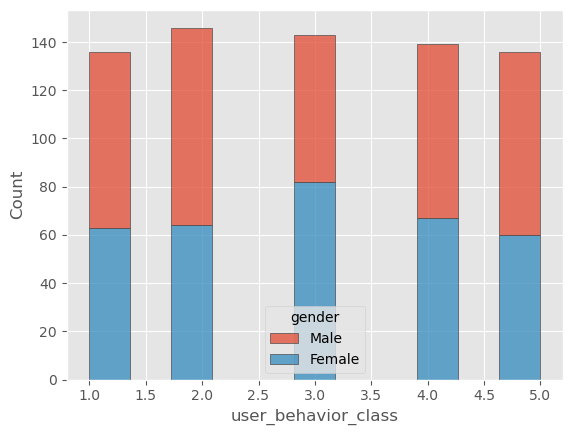

In [17]:
sns.histplot(
    users,
    x="user_behavior_class", hue="gender",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
)

In [18]:
# The Central Tendency measures are
mean = users['user_behavior_class'].mean()
median = users['user_behavior_class'].median()
print(f"Mean: {mean}, Median: {median}")

Mean: 2.99, Median: 3.0


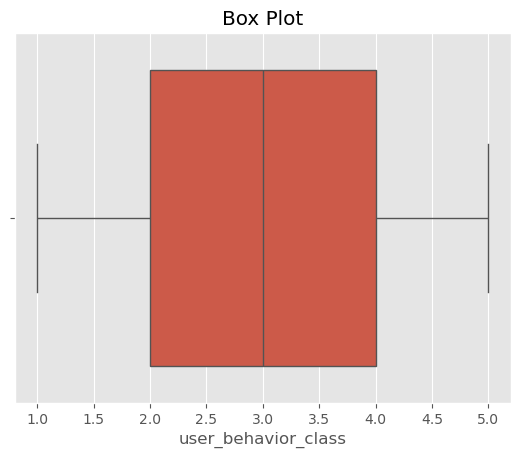

In [19]:
# The Outliers can be identifyed from a Boxplot
sns.boxplot(x=users['user_behavior_class'])
plt.title('Box Plot')
plt.show()

There are no outliers visible at first glance.

### - Analysis for variable "device_model":

Text(0.5, 1.0, 'Users of different device models')

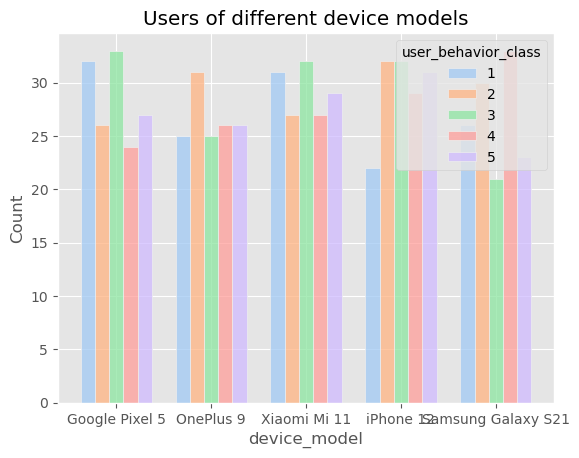

In [20]:
# The variable behave as:
sns.histplot(users, x='device_model', 
             hue='user_behavior_class', 
             multiple="dodge", 
             palette="pastel",
             shrink=.75)
plt.title("Users of different device models")

In [21]:
users['device_model'].unique()

array(['Google Pixel 5', 'OnePlus 9', 'Xiaomi Mi 11', 'iPhone 12',
       'Samsung Galaxy S21'], dtype=object)

In [22]:
# Since both variables are categorical in nature, the chi-squared test of independence will be used. 

# A contingency table is created.
devices = pd.crosstab(users.device_model, users.user_behavior_class)

# Then, I'll apply the non-parametric test for comparaison (Chi-squared):
stat, p, dof, expected = chi2_contingency(devices)
print("\nChi 2 squared Test:")
print(f"X2-statistic: {stat}, P-value: {p}")


Chi 2 squared Test:
X2-statistic: 9.323292999855825, P-value: 0.8995047686361158


The P-value calculated 0.8995 is higher than 0.05, then there is no variability explained by the type of device used. Therefore, This variable should not be included in the model.

### - Analysis for variable "gender":

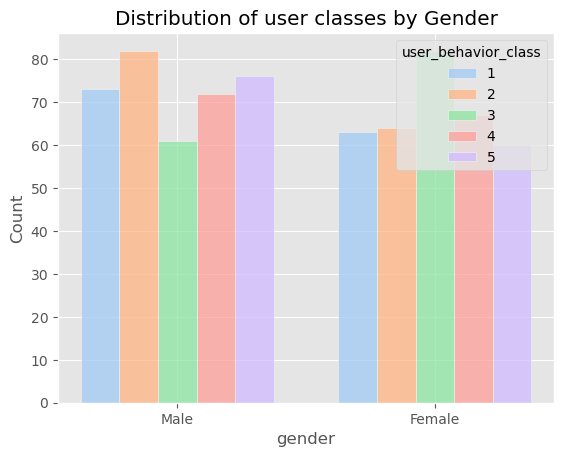

In [23]:
# The 'gender' variable behave as:
sns.histplot(x="gender", 
             hue="user_behavior_class", 
             multiple="dodge", 
             data=users, 
             shrink= 0.75, 
             palette="pastel")
plt.title("Distribution of user classes by Gender")
plt.show()

In [24]:
# Since both variables are categorical in nature, the chi-squared test of independence will be used. 

# A contingency table is created.
genders = pd.crosstab(users.gender, users.user_behavior_class)

# Then, I'll apply the non-parametric test for comparaison (Chi-squared):
stat, p, dof, expected = chi2_contingency(genders)
print("\nChi 2 squared Test:")
print(f"X2-statistic: {stat}, P-value: {p}")


Chi 2 squared Test:
X2-statistic: 6.99178419475091, P-value: 0.13632303058200942


The P-value calculated 0.1363230 is higher than 0.05, then there is no relationship between gender and user classes. That means, variability in user behaviour explained by the gender of the user. Therefore, This variable should not be included in the model.

### - Analysis for variable "operating_system":

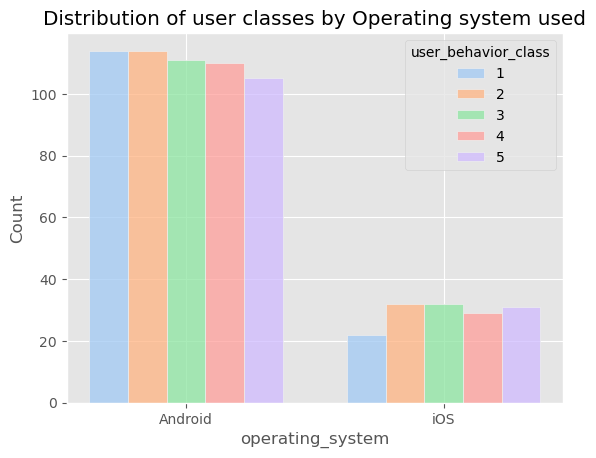

In [25]:
# The 'operating_system' variable behave as:
sns.histplot(x="operating_system", 
             hue="user_behavior_class", 
             multiple="dodge", 
             data=users, 
             shrink= 0.75, 
             palette="pastel")
plt.title("Distribution of user classes by Operating system used")
plt.show()

In [26]:
# Since both variables are categorical in nature, the chi-squared test of independence will be used. 

# A contingency table is created.
operating_system = pd.crosstab(users.operating_system, users.user_behavior_class)

# Then, I'll apply the non-parametric test for comparaison (Chi-squared):
stat, p, dof, expected = chi2_contingency(operating_system)
print("\nChi 2 squared Test:")
print(f"X2-statistic: {stat}, P-value: {p}")


Chi 2 squared Test:
X2-statistic: 2.4139480808456293, P-value: 0.6601080959701755


The P-value calculated 0.660108 is higher than 0.05, then there is no relationship between operating system used and user classes. That means, variability in user behaviour explained by the operating system of the user's phone. Therefore, This variable should not be included in the model.

### - Analysis for variable "age":

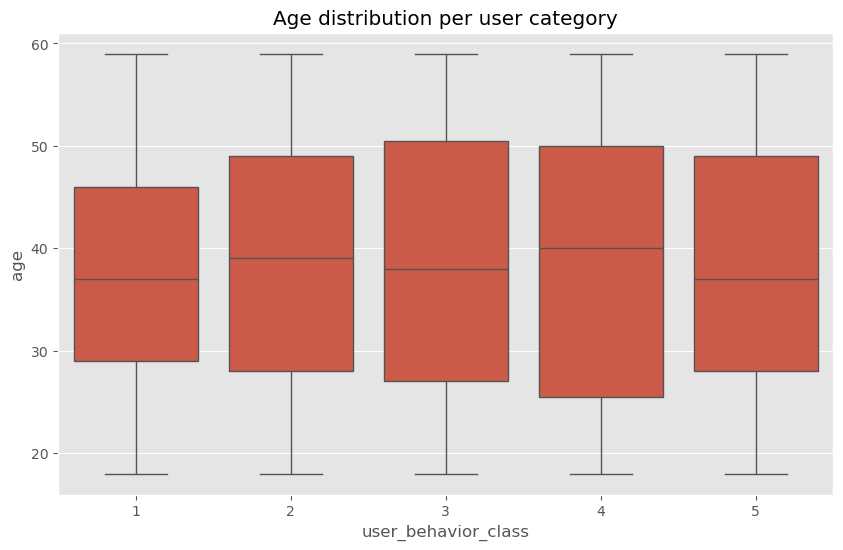

In [27]:
# visualizing the age distribution per user category
plt.figure(figsize=(10,6))
sns.boxplot(x='user_behavior_class', y='age', data=users)
plt.title('Age distribution per user category')
plt.show()

In [28]:
# The firts step is spliting the categories in the column as follows:
groups_age = [group["age"].values for name, group in users.groupby("user_behavior_class")]

# Test for Normality (Shapiro-Wilk)
print("Normality Test (Shapiro-Wilk):")
print("Class of user 1:", shapiro(groups_age[0]))
print("Class of user 2:", shapiro(groups_age[1]))
print("Class of user 3:", shapiro(groups_age[2]))
print("Class of user 4:", shapiro(groups_age[3]))
print("Class of user 5:", shapiro(groups_age[4]))

# Test for Equal Variances (Levene’s Test)
stat, p = levene(*groups_age)
print("\nLevene’s Test for Equal Variance:")
print(f"Statistic: {stat}, P-value: {p}")
print(f'There is not homogeinity of variance between group of devices because {p} is higher than 0.05')

Normality Test (Shapiro-Wilk):
Class of user 1: ShapiroResult(statistic=0.9601140392950264, pvalue=0.0005320171751616268)
Class of user 2: ShapiroResult(statistic=0.9554465055701064, pvalue=0.00011988118395769519)
Class of user 3: ShapiroResult(statistic=0.9305610052606342, pvalue=1.8080608319968525e-06)
Class of user 4: ShapiroResult(statistic=0.9310666622520742, pvalue=2.629407735150447e-06)
Class of user 5: ShapiroResult(statistic=0.9496488878272851, pvalue=7.278021089130132e-05)

Levene’s Test for Equal Variance:
Statistic: 1.827599921542959, P-value: 0.12168352328390827
There is not homogeinity of variance between group of devices because 0.12168352328390827 is higher than 0.05


In [33]:
# The assumption of normally distributed data is proven, but there is no evidence of homoscedasticity. 
# Then, I will apply the non-parametric Kruskal-Wallis test to assess differences between groups:
stat, p = kruskal(*groups_age)
print("Kruskal-Wallis H Test:")
print(f"H-statistic: {stat}, P-value: {p}")

Kruskal-Wallis H Test:
H-statistic: 0.22854571186024578, P-value: 0.9939475792329974


The P-value calculated 0.9939 is far higher than 0.05; then, any observed differences in age between user classes groups are likely due to random variation rather than a true relationship. Therefore, This variable should not be included in the model.

### - Analysis for variable "app_usage_time_(min/day)":

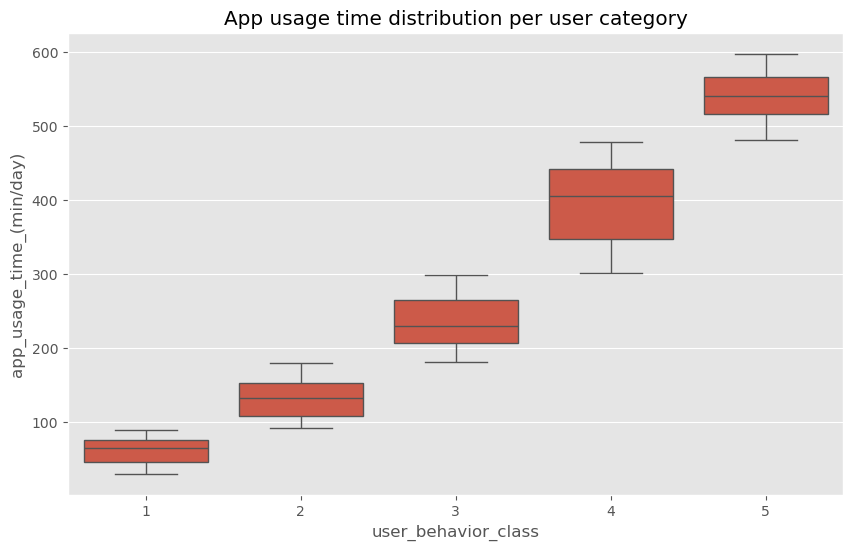

In [36]:
# visualizing the app usage time distribution per user category
plt.figure(figsize=(10,6))
sns.boxplot(x='user_behavior_class', y='app_usage_time_(min/day)', data=users)
plt.title('App usage time distribution per user category')
plt.show()

In [35]:
# The firts step is spliting the categories in the column as follows:
groups_app_usage = [group["app_usage_time_(min/day)"].values for name, group in users.groupby("user_behavior_class")]

# Test for Normality (Shapiro-Wilk)
print("Normality Test (Shapiro-Wilk):")
print("Class of user 1:", shapiro(groups_app_usage[0]))
print("Class of user 2:", shapiro(groups_app_usage[1]))
print("Class of user 3:", shapiro(groups_app_usage[2]))
print("Class of user 4:", shapiro(groups_app_usage[3]))
print("Class of user 5:", shapiro(groups_app_usage[4]))

# Test for Equal Variances (Levene’s Test)
stat, p = levene(*groups_app_usage)
print("\nLevene’s Test for Equal Variance:")
print(f"Statistic: {stat}, P-value: {p}")
print(f'There is homogeinity of variance between group of user classes because {p} is smaller than 0.05')

Normality Test (Shapiro-Wilk):
Class of user 1: ShapiroResult(statistic=0.9472808488530936, pvalue=4.7665563609424605e-05)
Class of user 2: ShapiroResult(statistic=0.9542199604472779, pvalue=9.406855993366491e-05)
Class of user 3: ShapiroResult(statistic=0.9471580689500327, pvalue=2.9769996337401914e-05)
Class of user 4: ShapiroResult(statistic=0.9402060510027039, pvalue=1.1528660275613888e-05)
Class of user 5: ShapiroResult(statistic=0.9644347136612353, pvalue=0.0012873018839486298)

Levene’s Test for Equal Variance:
Statistic: 46.95485178064219, P-value: 5.941588330548182e-35
There is homogeinity of variance between group of user classes because 5.941588330548182e-35 is smaller than 0.05


In [39]:
# The variable 'app_usage_time_(min/day)' follows a normal distribution, and evidence supports homoscedasticity between user groups. 
# Then, I will apply the parametric One-way ANOVA test to assess differences between groups:
stat, p = f_oneway(*groups_app_usage)
print("One-way ANOVA Test:")
print(f"F-statistic: {stat}, P-value: {p}")

One-way ANOVA Test:
F-statistic: 4555.299163870112, P-value: 0.0


As observed in the image above, some classes have significantly higher usage times than others. The extremely small p-value suggests that the observed differences in group means are almost certainly not due to random chance. Therefore, this variable clearly differentiates user behavior.

### - Analysis for variable "screen_on_time_(min/day)":

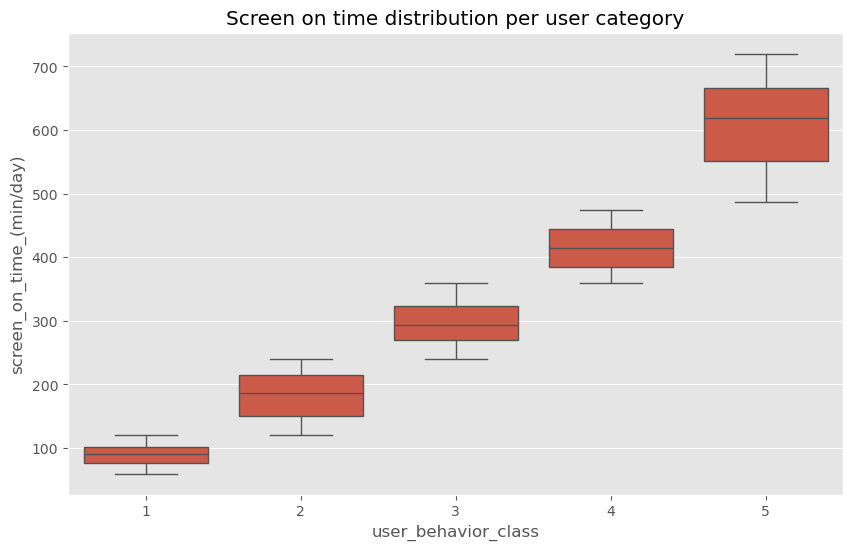

In [37]:
# visualizing the app usage time distribution per user category
plt.figure(figsize=(10,6))
sns.boxplot(x='user_behavior_class', y='screen_on_time_(min/day)', data=users)
plt.title('Screen on time distribution per user category')
plt.show()

In [38]:
# The firts step is spliting the categories in the column as follows:
groups_screen = [group["screen_on_time_(min/day)"].values for name, group in users.groupby("user_behavior_class")]

# Test for Normality (Shapiro-Wilk)
print("Normality Test (Shapiro-Wilk):")
print("Class of user 1:", shapiro(groups_screen[0]))
print("Class of user 2:", shapiro(groups_screen[1]))
print("Class of user 3:", shapiro(groups_screen[2]))
print("Class of user 4:", shapiro(groups_screen[3]))
print("Class of user 5:", shapiro(groups_screen[4]))

# Test for Equal Variances (Levene’s Test)
stat, p = levene(*groups_screen)
print("\nLevene’s Test for Equal Variance:")
print(f"Statistic: {stat}, P-value: {p}")
print(f'There is homogeinity of variance between group of user classes because {p} is smaller than 0.05')

Normality Test (Shapiro-Wilk):
Class of user 1: ShapiroResult(statistic=0.951463560727136, pvalue=0.00010130594441840498)
Class of user 2: ShapiroResult(statistic=0.9481646124406252, pvalue=2.9639694764748247e-05)
Class of user 3: ShapiroResult(statistic=0.957196183711702, pvalue=0.00020142913868483834)
Class of user 4: ShapiroResult(statistic=0.9392486001939377, pvalue=9.822379138439395e-06)
Class of user 5: ShapiroResult(statistic=0.9465914588564697, pvalue=4.221232855650459e-05)

Levene’s Test for Equal Variance:
Statistic: 73.65950492550043, P-value: 4.793197178324948e-52
There is homogeinity of variance between group of user classes because 4.793197178324948e-52 is smaller than 0.05


In [40]:
# The variable 'screen_on_time_(min/day)' follows a normal distribution, and evidence supports homoscedasticity between user groups. 
# Then, I will apply the parametric One-way ANOVA test to assess differences between groups:
stat, p = f_oneway(*groups_screen)
print("One-way ANOVA Test:")
print(f"F-statistic: {stat}, P-value: {p}")

One-way ANOVA Test:
F-statistic: 3272.298927152075, P-value: 0.0


Based on the image above, certain classes exhibit notably higher usage times compared to others. The very small p-value indicates that the differences in group means are highly unlikely to be due to random variation. As a result, this variable effectively distinguishes user behavior.

In [30]:
users.columns

Index(['user_id', 'device_model', 'operating_system',
       'app_usage_time_(min/day)', 'screen_on_time_(hours/day)',
       'battery_drain_(mah/day)', 'number_of_apps_installed',
       'data_usage_(mb/day)', 'age', 'gender', 'user_behavior_class',
       'screen_on_time_(min/day)'],
      dtype='object')